Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

samp1 = np.random.choice(pop1, 100, replace = 'True')
samp2 = np.random.choice(pop2, 100, replace = 'True')

print('Mean of samp1: ', np.mean(samp1))
print('Mean of samp2: ', np.mean(samp2))
print('Standard Deviation of samp1: ', np.std(samp1))
print('Standard Deviation of samp2: ', np.std(samp2))

Mean of samp1:  1.79
Mean of samp2:  4.94
Standard Deviation of samp1:  1.051617801294748
Standard Deviation of samp2:  1.541557653803451


For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

# 1) Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

**Prediction: If we increase sample size, means will move closer to true means of 2 and 5 (opposite if we decrease sample size). Standard deviations will be similar. Please see analogy below for explanation: 

The standard deviation is a measurement of the "spread" of your data. The analogy I like to use is target shooting. If you're an accurate shooter, your shots cluster very tightly around the bullseye (small standard deviation). If you're not accurate, they are more spread out (large standard deviation).

Some data is fundamentally "all over the place", and some is fundamentally tightly clustered about the mean.

# If you take more measurements, you are getting a more accurate picture of the spread. You shouldn't expect to get less spread (or more spread, for that matter)--just less error in your measurement of a fundamental characteristic of the data.

If you have an inaccurate shooter take five shots, and an accurate shooter take five shots, you will get a not-too-reliable idea of their accuracy. Maybe the inaccurate shooter got lucky a few times, so the pattern is tighter than you would expect from him over the long haul. Similarly, maybe you caught the accurate shooter at a bad time and just happened to get two bad shots in the five, skewing the results.

If, instead, you have them each take a thousand shots, then you will be much more confident that you are getting a good look at their actual accuracy. It's not the accuracy of the shooter changing as you get more data--it's the confidence you have in the picture you are getting of their accuracy.

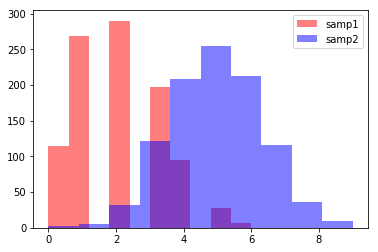

Mean of samp1:  2.001
Mean of samp2:  5.001
Standard Deviation of samp1:  1.2918974417499247
Standard Deviation of samp2:  1.5169044136002772


In [27]:
samp1 = np.random.choice(pop1, 1000, replace = 'True')
samp2 = np.random.choice(pop2, 1000, replace = 'True')

plt.hist(samp1, alpha = 0.5, color = 'red', label = 'samp1')
plt.hist(samp2, alpha = 0.5, color = 'blue', label = 'samp2')
plt.legend(loc = 'upper right')
plt.show()

print('Mean of samp1: ', np.mean(samp1))
print('Mean of samp2: ', np.mean(samp2))
print('Standard Deviation of samp1: ', np.std(samp1))
print('Standard Deviation of samp2: ', np.std(samp2))

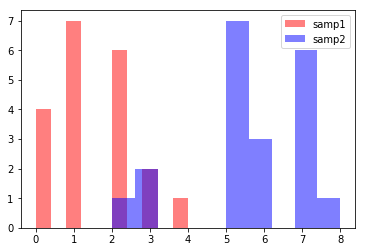

Mean of samp1:  1.45
Mean of samp2:  5.55
Standard Deviation of samp1:  1.0712142642814275
Standard Deviation of samp2:  1.5321553446044565


In [29]:
samp1 = np.random.choice(pop1, 20, replace = 'True')
samp2 = np.random.choice(pop2, 20, replace = 'True')

plt.hist(samp1, alpha = 0.5, color = 'red', label = 'samp1')
plt.hist(samp2, alpha = 0.5, color = 'blue', label = 'samp2')
plt.legend(loc = 'upper right')
plt.show()

print('Mean of samp1: ', np.mean(samp1))
print('Mean of samp2: ', np.mean(samp2))
print('Standard Deviation of samp1: ', np.std(samp1))
print('Standard Deviation of samp2: ', np.std(samp2))

# 2) Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

**Prediction: t-value will decrease when we swith to p=0.4 from p=0.3 for pop1 because it is a measure of the difference of the sample means in terms of number of standard errors. The sample means should be closer (0.4 is closer to 0.5 than 0.3 is), so the DIFFERENCE between sample means will be smaller and the standard errors should be comparable since there is no reason for larger (or smaller) standard deviations between the pop1 samples with p=0.3 or p=0.4.

$$se=\sqrt{\frac {s_1^2 } n_1 + \frac {s_2^2 } n_2}$$

Consequently, the p value for pop1 where p=0.4 will be larger than when p=0.3.

In [42]:
import scipy
from scipy.stats import ttest_ind

pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

samp1 = np.random.choice(pop1, 1000, replace = 'True')
samp2 = np.random.choice(pop2, 1000, replace = 'True')

devs = np.array([np.std(samp1), np.std(samp2)])
num = np.array([len(samp1), len(samp2)])
se = sum(devs ** 2 / num) ** 0.5
y = np.mean(samp1) - np.mean(samp2)

t_stat = y / se
print('Standard Error: ', se)
print('Calculated T-Stat: ', t_stat)
print(ttest_ind(samp1, samp2, equal_var = False))

Standard Error:  0.06611406809446836
Calculated T-Stat:  -31.58178070386655
Ttest_indResult(statistic=-31.565985863816937, pvalue=2.162084968189641e-177)


In [43]:
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

samp1 = np.random.choice(pop1, 1000, replace = 'True')
samp2 = np.random.choice(pop2, 1000, replace = 'True')

devs = np.array([np.std(samp1), np.std(samp2)])
num = np.array([len(samp1), len(samp2)])
se = sum(devs ** 2 / num) ** 0.5
y = np.mean(samp1) - np.mean(samp2)

t_stat = y / se
print('Standard Error: ', se)
print('Calculated T-Stat: ', t_stat)
print(ttest_ind(samp1, samp2, equal_var = False))

Standard Error:  0.06861981492251346
Calculated T-Stat:  -14.29616213782798
Ttest_indResult(statistic=-14.28901226884473, pvalue=3.5684119778167457e-44)


# 3) Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

The Central Limit Theorem says the statistics should still work as long as the sample size is large enough, no matter what distribution is chosen.